#  --------------        HOUSE PRICE PROJECT  ----------------

<img src = "forsale.jpg" style = "width: 500px"/>

# Content

### 1. Import packages

### 2. Load data

### 3. Data preparation

    3.1 Separate the numerical featurs form the categoricals  
    3.2 Remove outliers
    3.3 Treat missing values

### 4.Exploratory Data Analysis

    4.1  Correlation matrix
    4.2  Feature engineering

### 5. Modeling

    5.1  Preparation of datasets
    5.2  Training

### 6. Conclusion

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [100]:
house_df = pd.read_csv('train.csv')
print('house data : \n columns: {}  rows: {}'.format(house_df.shape[1], house_df.shape[0]))

house data : 
 columns: 81  rows: 1460


In [101]:
# house_df.info()

In [102]:
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,...,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,...,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,...,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,...,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,...,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,...,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [103]:
# house_df['SalePrice'].describe()

In [104]:
#fig = plt.figure()
#ax = fig.gca()
#ax.hist(house_df['SalePrice'], bins=40, color='blue')
#ax.set_title('Histogram of Prices')
# plt.show()

In [105]:
all_nulls = house_df.isnull().sum()
all_nulls = all_nulls.drop(all_nulls[all_nulls == 0].index).sort_values(ascending=False)
all_nulls

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

#### droping some columns with significant nulls .

In [106]:
house_df = house_df.drop(['Alley','PoolArea','PoolQC','MiscFeature','MiscVal'], axis=1).reset_index(drop=True)

### get numerical columns of dataframe into lists.

In [107]:
numeric = list(house_df.columns[house_df.dtypes != "object"])
print(len(numeric))
print(numeric, '\n\n')
pd.options.display.max_columns = 50
house_df[numeric].describe()

36
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MoSold', 'YrSold', 'SalePrice'] 




,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,12.000000,2010.000000,755000.000000


### Checking for null values in the numerical columns

In [108]:
Nulls = house_df[numeric].isnull().sum()

# get rid of all the values with 0 missing values
Nulls = Nulls.drop(Nulls[Nulls == 0].index).sort_values(ascending=False)
Nulls

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
dtype: int64

## ###  LotFrontage

looking at the data description i found that
LotFrontage is the Linear feet of street connected to property ,
therefor i thought it will be reasonable to fiil the missing values , with the Neighborhood LotFrontage median value !!!

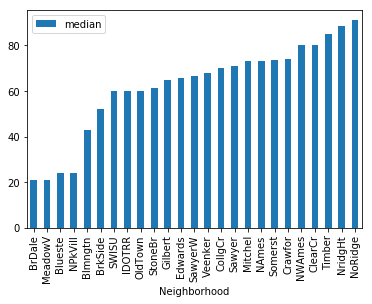

In [109]:
house_df.groupby('Neighborhood')['LotFrontage'].agg({'median':np.median}).sort_values(by='median').plot(kind='bar')

### filling the missing values with Neighborhood median LotFrontage

In [110]:
house_df["LotFrontage"] = house_df.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

## ### GarageYrBlt 

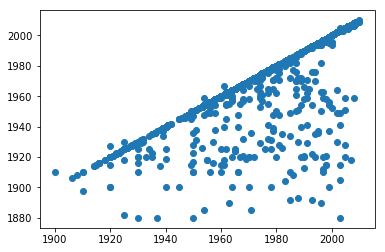

In [111]:
plt.scatter(house_df['GarageYrBlt'], house_df['YearBuilt'])
plt.show()

In [112]:
same_y_count = house_df.loc[house_df['GarageYrBlt'] == house_df['YearBuilt']]
same_y_count.shape

(1089, 76)

* looking at the scatterd plot we can make the assamption most ( 1089/1460 = 75% ) 
  of the garage where built the same year as the house

* Filling the nulls in GarageYrBlt with the same year as YearBuilt. 
* We will probably drop this column later for it's high corrolation with the YearBuilt column .

In [113]:
house_df.loc[house_df['GarageYrBlt'].isna(),'GarageYrBlt'] = house_df['YearBuilt']

## ###  MasVnrArea

<img src="masonryveneer.jpg" style = "width: 500px"/>

* Masonry veneer walls consist of a single non-structural external layer of masonry, typically made of brick, stone or manufactured stone.
* advantages of a masonry veneer include: additional insulation , lighter-weight , add aesthetic appeal to a structure .
* I will fill ‘MasVnrArea’ variable null values with (0) as it indicates no Masonry veneer built.

In [115]:
house_df['MasVnrArea'].fillna(0, inplace=True)

In [116]:
Nulls = house_df[numeric].isnull().sum()

# get rid of all the values with 0 missing values
Nulls = Nulls.drop(Nulls[Nulls == 0].index).sort_values(ascending=False)
Nulls

Series([], dtype: int64)

# Checking the numerical columns !!!

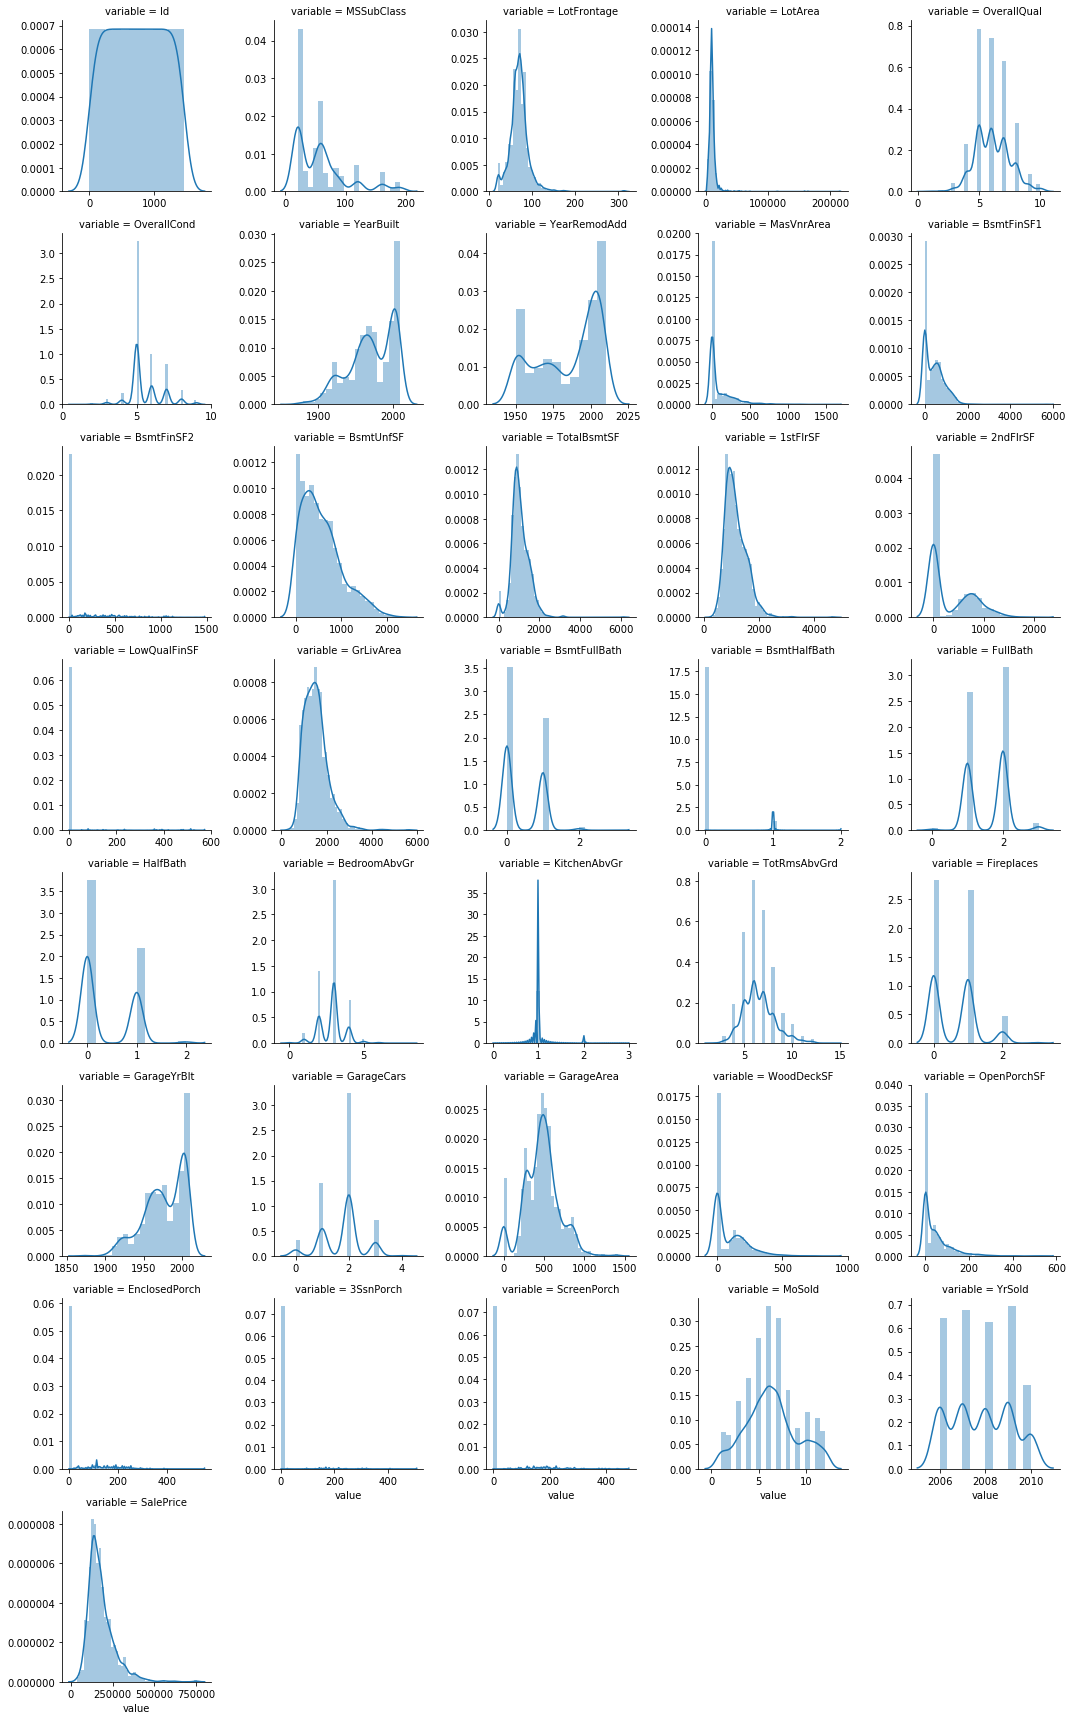

In [23]:
numdf=pd.melt(house_df,value_vars=numeric)
numgrid=sns.FacetGrid(numdf,col='variable',col_wrap=5,sharex=False,sharey=False)
numgrid=numgrid.map(sns.distplot,'value')
numgrid

### two things where found by looking at these plots
1. columns with significant one value counts . i will put them in a list in order to drop them !
2. dummy numerical columns that are actually categorial features . i wiil put them in a list and add them to the categorical ones

In [117]:
drop_col = ['MasVnrArea' , 'BsmtFinSF2' , 'LowQualFinSF' , 'BsmtHalfBath' , 'KitchenAbvGr' , 'EnclosedPorch' , '3SsnPorch' , 'ScreenPorch' , 'MoSold' , 'YrSold' ]

In [118]:
house_df = house_df.drop(drop_col, axis=1).reset_index(drop=True)

In [119]:
house_df.shape

(1460, 66)

#### befor checking for outliers we need to extract the hidden categorial columns from the numerical .

In [120]:
# Checking Tool

# df1 = house_df.groupby('OpenPorchSF')['Id'].nunique()
# df1

In [121]:
hidden_col = ['MSSubClass', 'OverallQual','OverallCond', 'BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','Fireplaces']

In [122]:
for i in hidden_col :
    
    numeric.remove(i)
    
print(numeric)

['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MoSold', 'YrSold', 'SalePrice']


In [123]:
numeric = list(house_df.columns[house_df.dtypes != "object"])

In [124]:
print(len(numeric))

26


# cheking for high corralted features 

### Need a HeatMap here !!

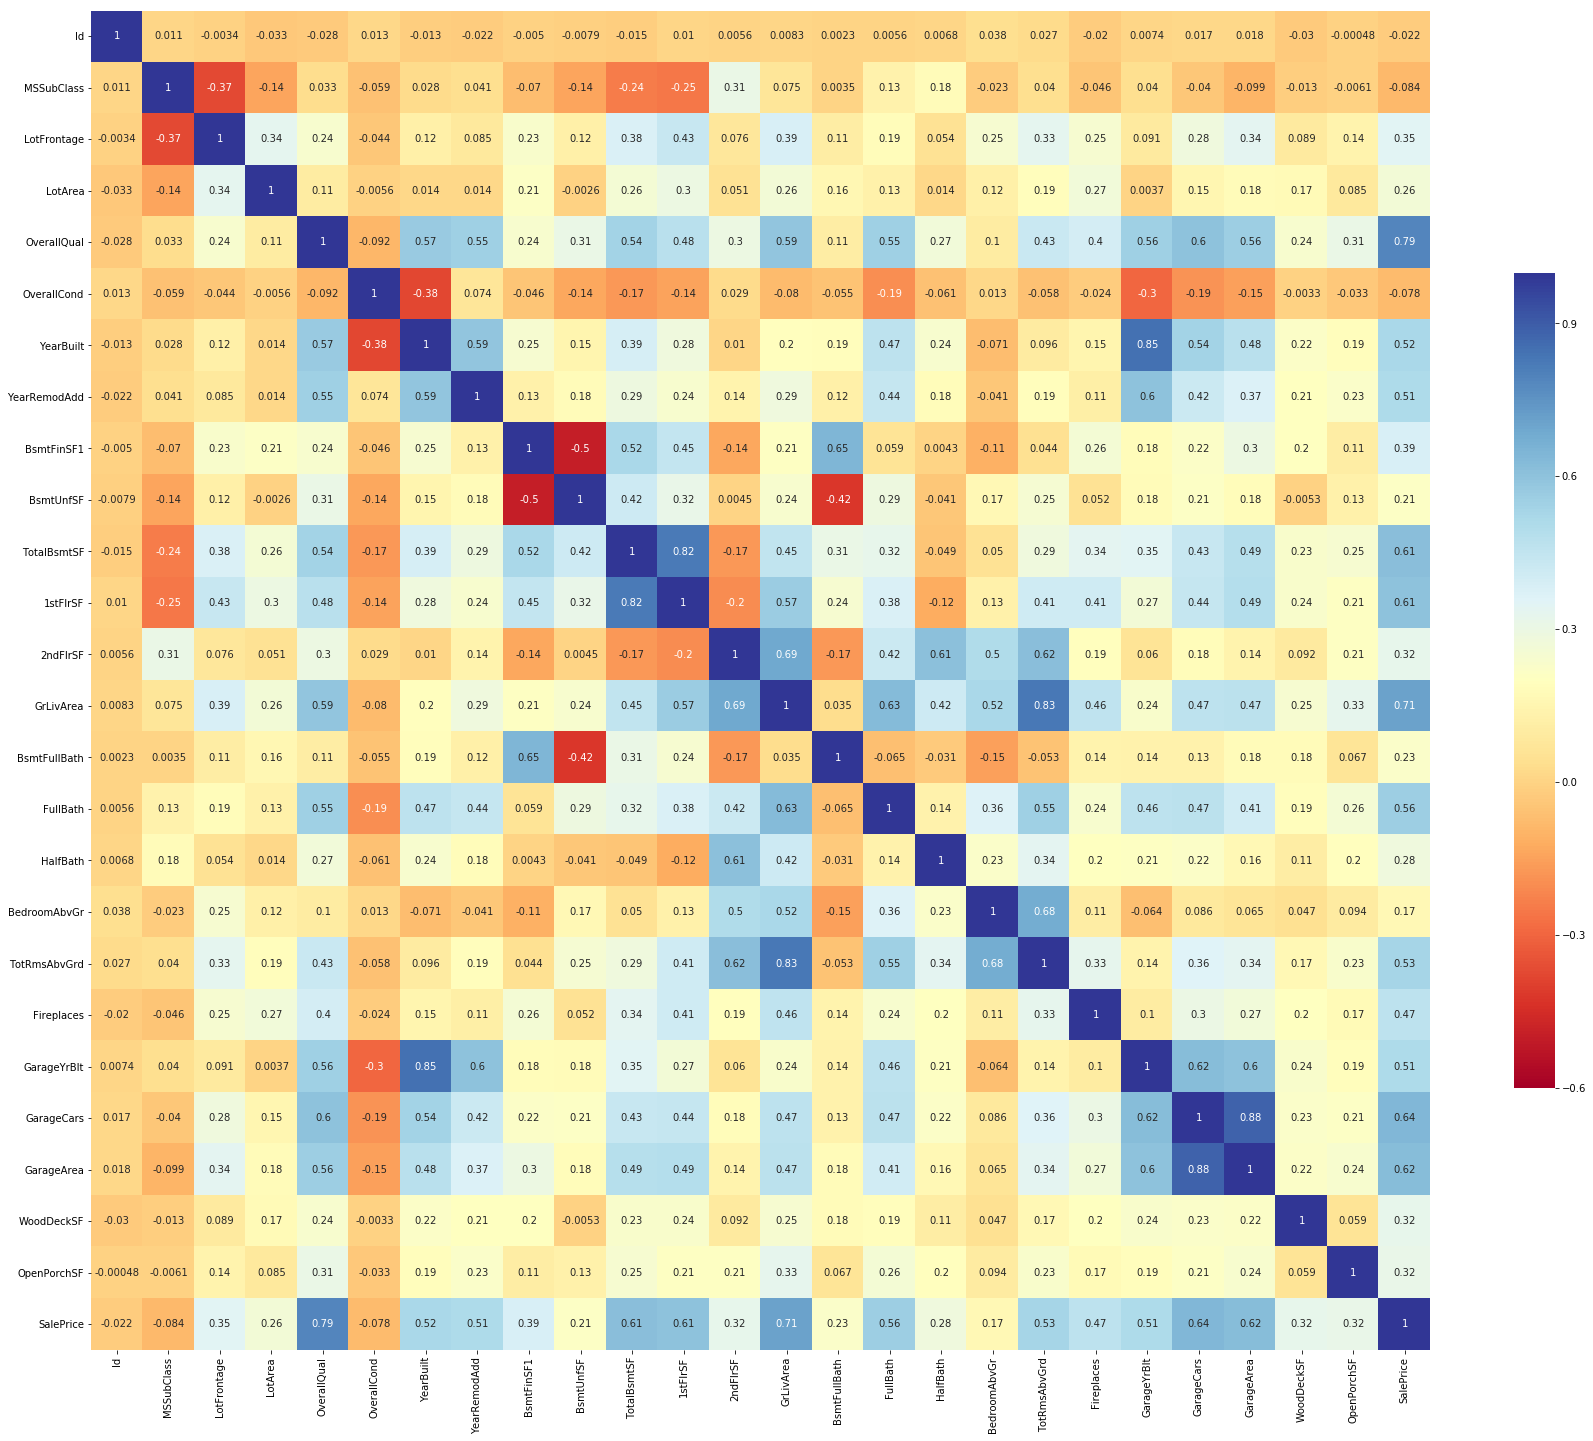

In [84]:
corr = house_df[numeric].corr()
plt.subplots(figsize=(30, 30))
cmap = sns.diverging_palette(150, 250, as_cmap=True)
sns.heatmap(corr, cmap="RdYlBu", vmax=1, vmin=-0.6, center=0.2, square=True, linewidths=0, cbar_kws={"shrink": .5}, annot = True);

In [125]:
numeric_df = house_df[numeric].drop(['Id'], axis=1)

c = numeric_df.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)
print(so[25:45])

GarageArea    GarageCars      0.882475
GarageCars    GarageArea      0.882475
YearBuilt     GarageYrBlt     0.845141
GarageYrBlt   YearBuilt       0.845141
GrLivArea     TotRmsAbvGrd    0.825489
TotRmsAbvGrd  GrLivArea       0.825489
TotalBsmtSF   1stFlrSF        0.819530
1stFlrSF      TotalBsmtSF     0.819530
SalePrice     OverallQual     0.790982
OverallQual   SalePrice       0.790982
GrLivArea     SalePrice       0.708624
SalePrice     GrLivArea       0.708624
2ndFlrSF      GrLivArea       0.687501
GrLivArea     2ndFlrSF        0.687501
TotRmsAbvGrd  BedroomAbvGr    0.676620
BedroomAbvGr  TotRmsAbvGrd    0.676620
BsmtFinSF1    BsmtFullBath    0.649212
BsmtFullBath  BsmtFinSF1      0.649212
SalePrice     GarageCars      0.640409
GarageCars    SalePrice       0.640409
dtype: float64


In [126]:
# c[(c<1)&(c>0.7)].dropna(axis=0, how='all').dropna(axis=1, how='all')

In [127]:
# scater1 = sns.scatterplot(x = 'GarageYrBlt', y = 'SalePrice', data = house_df )

In [128]:
corr_col = ['GarageCars' , 'GarageYrBlt' , 'TotRmsAbvGrd' , '1stFlrSF']  

In [129]:
house_df = house_df.drop(corr_col, axis=1).reset_index(drop=True)

In [130]:
house_df.shape

(1460, 62)

In [131]:
# numeric = list(house_df.columns[house_df.dtypes != "object"])
# print(len(numeric))

In [132]:
# plt.scatter(house_df['1stFlrSF'], house_df['Id'])
# plt.show()

In [133]:
# pd.options.display.max_columns = 50
# house_df[numeric].describe()

# checking for outliers

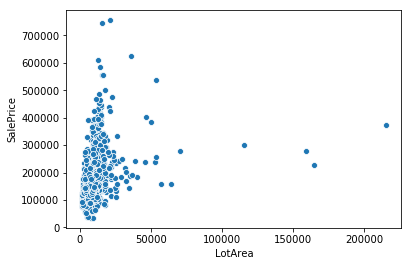

In [134]:
scater = sns.scatterplot(x = 'LotArea', y = 'SalePrice', data = house_df )

In [135]:
# LotFrontage >300 , BsmtFinSF1 >5000 , TotalBsmtSF >5000 ,OpenPorchSF >450 , GrLivArea >4000
house_df = house_df.drop(house_df[(house_df['LotFrontage']>300)].index)
house_df = house_df.drop(house_df[(house_df['BsmtFinSF1']>5000)].index)
house_df = house_df.drop(house_df[(house_df['TotalBsmtSF']>5000)].index)
house_df = house_df.drop(house_df[(house_df['LotArea']>100000)].index)
house_df = house_df.drop(house_df[(house_df['OpenPorchSF']>400)].index)
house_df = house_df.drop(house_df[(house_df['GrLivArea']>4000)].index)

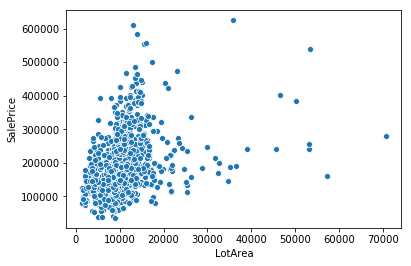

In [136]:
scater = sns.scatterplot(x = 'LotArea', y = 'SalePrice', data = house_df )

In [137]:
house_df.shape

(1447, 62)

### get catgorical columns of dataframe into lists.

In [138]:
categorical= list(house_df.columns[house_df.dtypes == "object"])
print(len(categorical))
print(type(categorical))

40
<class 'list'>


In [139]:
categorical.extend(hidden_col)
print(type(categorical))

<class 'list'>


In [140]:
print(len(categorical))
print(categorical, '\n\n')
pd.options.display.max_columns = 50
house_df[categorical].describe()

48
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition', 'MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'Fireplaces'] 




,MSSubClass,OverallQual,OverallCond,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces
count,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000
mean,56.914305,6.087077,5.572909,0.421562,1.559779,0.382170,2.862474,0.604008
std,42.291694,1.367734,1.110760,0.514551,0.546951,0.502869,0.814645,0.636650
min,20.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,5.000000,5.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,50.000000,6.000000,5.000000,0.000000,2.000000,0.000000,3.000000,1.000000
75%,70.000000,7.000000,6.000000,1.000000,2.000000,1.000000,3.000000,1.000000
max,190.000000,10.000000,9.000000,3.000000,3.000000,2.000000,8.000000,3.000000


### Checking nulls

In [141]:
# updating the categorical list !!
categorical2= list(house_df.columns[house_df.dtypes == "object"])

cat_nulls = house_df[categorical2].isnull().sum()[house_df[categorical2].isnull().sum()>0].sort_values(ascending=False)
cat_nulls

Fence           1169
FireplaceQu      689
GarageCond        80
GarageQual        80
GarageFinish      80
GarageType        80
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrType         8
Electrical         1
dtype: int64

In [142]:
house_df['GarageType'] = house_df['GarageType'].fillna('Attchd')
house_df['BsmtFinType1'] = house_df['BsmtFinType1'].fillna('GLQ')
house_df['BsmtQual'] = house_df['BsmtQual'].fillna('Gd')
house_df['MasVnrType'] = house_df['MasVnrType'].fillna('BrkFace')

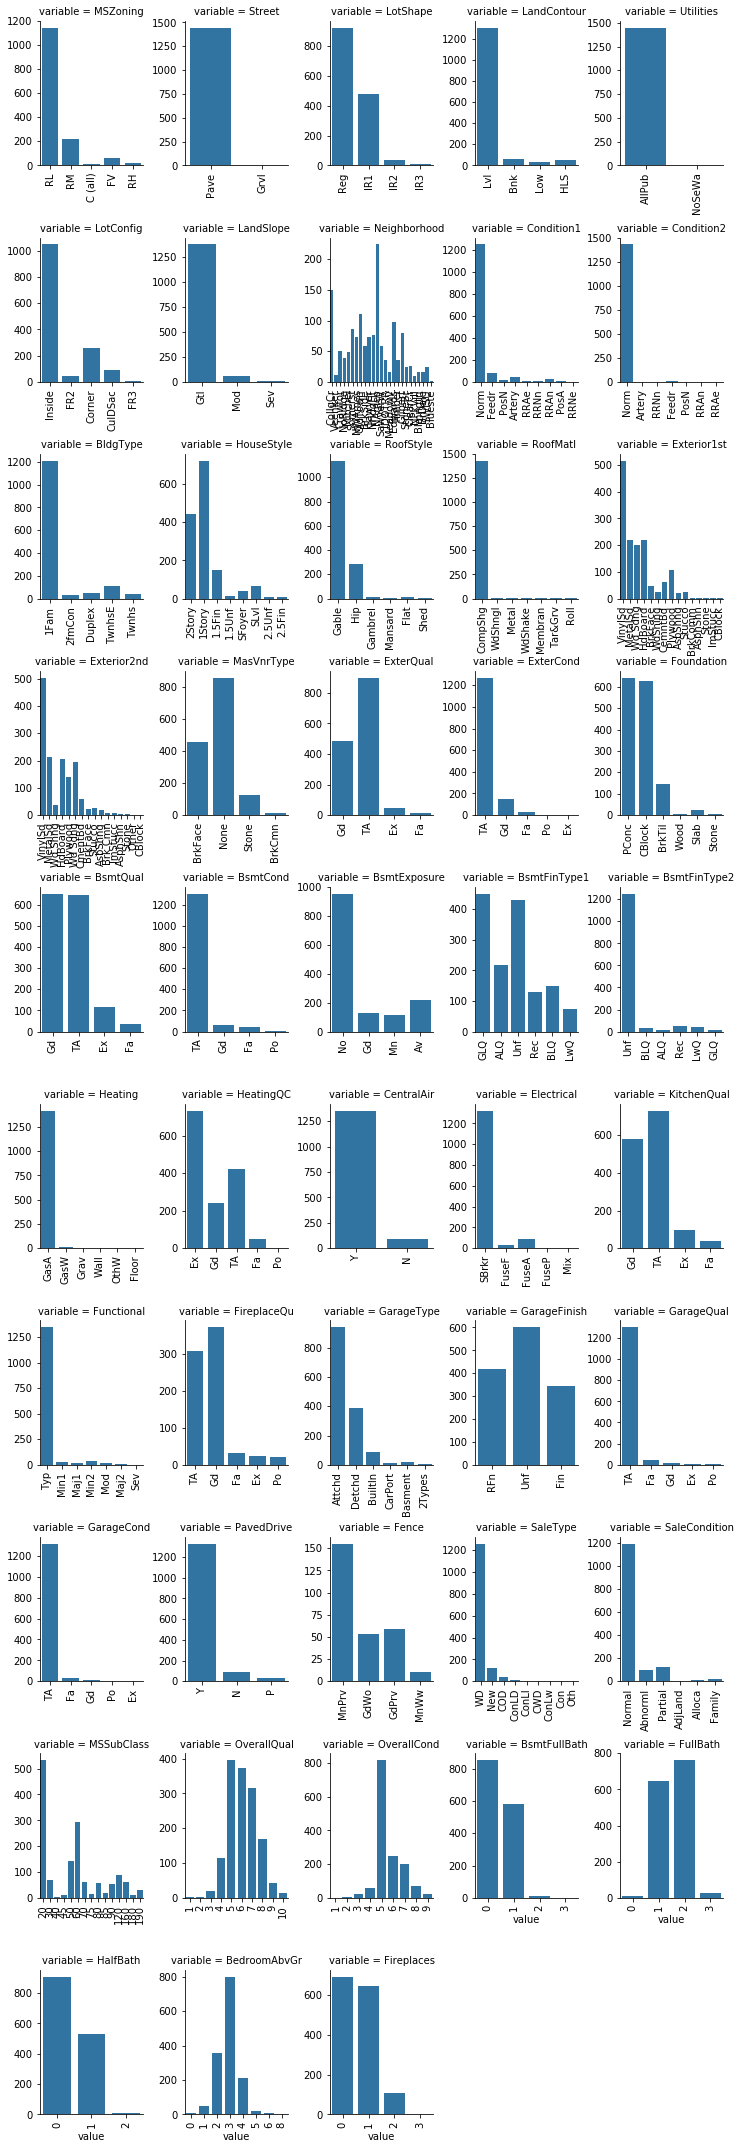

In [47]:
coldf=pd.melt(house_df,value_vars=categorical)
colgrid=sns.FacetGrid(coldf,col='variable',col_wrap=5,height=3,aspect=.7,sharex=False,sharey=False)
plt.xticks(rotation=90) 
colgrid = colgrid.map(sns.countplot,'value', order=None)
plt.tight_layout()
plt.subplots_adjust(hspace=0.5, wspace=0.4)


###rotating x axis labels to prevent overlapping
for ax in colgrid.axes:
    for label in ax.get_xticklabels():
        label.set_rotation(90)
colgrid

### Checking for problematic columns with significant one classe counts in the categorical columns

# this columns below have one category counting for more then 1200 of the total 1460 counts....off with their heads !!!

In [143]:
problematic_cols=['Street','Utilities','LandSlope','Condition2','RoofMatl','Exterior2nd','ExterCond','BsmtCond','BsmtExposure','BsmtFinType2','Heating','CentralAir','Electrical','Functional','FireplaceQu','GarageFinish','GarageQual','GarageCond','PavedDrive','Fence','SaleType','SaleCondition']
print(len(problematic_cols))
house_df = house_df.drop(problematic_cols, axis=1).reset_index(drop=True)

22


In [144]:
house_df.shape

(1447, 40)

# dealing with many attributes in some categories (Neigborhood, Exterior1st...) I had to come up with an idea by combine levels.

# i ploted below the median of saleprice for each neighborhood type and it gave me an idea to combine levels with similar height into a single level.

### * Since most of these features are ordinal, i.e. the categories represent different levels of order, I will replace the values by hand.

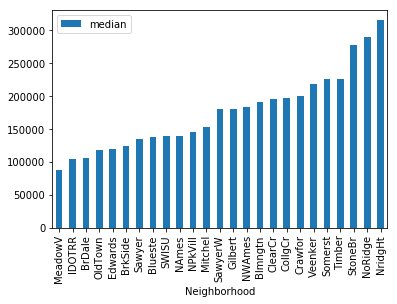

In [145]:
house_df.groupby('Neighborhood')['SalePrice'].agg({'median':np.median}).sort_values(by='median').plot(kind='bar')


In [146]:
inspection_cols = ['MSZoning','LotShape','LandContour','LotConfig','Neighborhood','Condition1','BldgType','HouseStyle','RoofStyle','Exterior1st','MasVnrType','ExterQual','Foundation','BsmtQual','BsmtFinType1','HeatingQC','KitchenQual','GarageType']
print(len(inspection_cols))

18


In [147]:
hidden_col_insp = ['MSSubClass', 'OverallQual','OverallCond', 'BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','Fireplaces']
print(len(hidden_col_insp))

8


In [148]:
df = house_df.groupby('MSSubClass')['Id'].nunique()
df

MSSubClass
20     532
30      68
40       4
45      12
50     142
60     295
70      60
75      15
80      58
85      20
90      52
120     87
160     63
180     10
190     29
Name: Id, dtype: int64

In [149]:
house_df['Fireplaces'] = house_df['Fireplaces'].astype(str)

Fireplaces_dic = {"0": 0, "1": 1, "2": 1, "3": 2}

house_df['Fireplaces'] = house_df['Fireplaces'].map(Fireplaces_dic)

In [150]:
house_df['FullBath'] = house_df['FullBath'].astype(str)

FullBath_dic = {"0": 0, "1": 0, "2": 1, "3": 2}

house_df['FullBath'] = house_df['FullBath'].map(FullBath_dic)

In [151]:
house_df['OverallQual'] = house_df['OverallQual'].astype(str)

OverallQual_dic = {"1": 0, "2": 0, "3": 1, "4": 1, "5": 1, "6": 2, "7": 2, "8": 3, "9": 4, "10": 5}

house_df['OverallQual'] = house_df['OverallQual'].map(OverallQual_dic)

In [152]:
house_df['MSSubClass'] = house_df['MSSubClass'].astype(str)

MSSubClass_dic = {"180": 0, "30": 0, "45": 0, "190": 1, "50": 1, "90": 1, "85": 1, 
                  "40": 1, "160": 1, "70": 2, "20": 2, "75": 2, "80": 2, "120": 3, "60": 3}

house_df['MSSubClass'] = house_df['MSSubClass'].map(MSSubClass_dic)

In [153]:
GarageType_dic = {"CarPort": 0, "Detchd": 0, "2Types": 1, "Attchd": 1, "Basment": 1, "BuiltIn": 2}
house_df['GarageType'] = house_df['GarageType'].map(GarageType_dic)

In [154]:
KitchenQual_dic = {"Fa": 0, "TA": 1, "Gd": 2, "Ex": 3}
house_df['KitchenQual'] = house_df['KitchenQual'].map(KitchenQual_dic)

In [155]:
HeatingQC_dic = {"Po": 0, "Fa": 1, "TA": 1, "Gd": 1, "Ex": 2}
house_df['HeatingQC'] = house_df['HeatingQC'].map(HeatingQC_dic)

In [156]:
BsmtFinType1_dic = {"ALQ": 0, "BLQ": 0, "LwQ": 0, "Rec": 0, "Unf": 0, "GLQ": 1}
house_df['BsmtFinType1'] = house_df['BsmtFinType1'].map(BsmtFinType1_dic)

In [157]:
BsmtQual_dic = {"Fa": 0, "TA": 1, "Gd": 2, "Ex": 3}
house_df['BsmtQual'] = house_df['BsmtQual'].map(BsmtQual_dic)

In [158]:
Foundation_dic = {"BrkTil": 0, "Slab": 0, "Stone": 0, "CBlock": 1, "Wood": 1, "PConc": 2}
house_df['Foundation'] = house_df['Foundation'].map(Foundation_dic)

In [159]:
ExterQual_dic = {"Fa": 0, "TA": 1, "Gd": 2, "Ex": 3}
house_df['ExterQual'] = house_df['ExterQual'].map(ExterQual_dic)

In [160]:
MasVnrType_dic = {"BrkCmn": 0, "None": 0, "BrkFace": 1, "Stone": 2}
house_df['MasVnrType'] = house_df['MasVnrType'].map(MasVnrType_dic)

In [161]:
Exterior1st_dic = {"BrkComm": 0, "AsbShng": 0, "AsphShn": 0, "CBlock": 0, "Wd Sdng": 1, "WdShing": 1, 
                   "MetalSd": 1, "Stucco": 1, "HdBoard": 1, "BrkFace": 2, "Plywood": 2, "VinylSd": 3, 
                   "CemntBd": 4, "Stone": 4, "ImStucc": 4}

house_df['Exterior1st'] = house_df['Exterior1st'].map(Exterior1st_dic)

In [162]:
RoofStyle_dic = {"Gable": 0, "Flat": 1, "Gambrel": 1, "Hip": 1, "Mansard": 1, "Shed": 1}
house_df['RoofStyle'] = house_df['RoofStyle'].map(RoofStyle_dic)

In [163]:
HouseStyle_dic = {"1Story": 0, "1.5Fin": 1, "1.5Unf": 1, "2Story": 2, "2.5Fin": 2, 
                  "2.5Unf": 2, "SFoyer": 3, "SLvl": 3}

house_df['HouseStyle'] = house_df['HouseStyle'].map(HouseStyle_dic)

In [164]:
BldgType_dic = {"1Fam": 0, "2fmCon": 1, "Duplex": 1, "Twnhs": 1, "TwnhsE": 1}
house_df['BldgType'] = house_df['BldgType'].map(BldgType_dic)

In [165]:
Condition1_dic = {"Artery": 0, "Feedr": 0, "RRAe": 0, "Norm": 1, "RRAn": 1, "RRNe": 2, 
                  "PosN": 2, "PosA": 3, "RRNn": 3}

house_df['Condition1'] = house_df['Condition1'].map(Condition1_dic)

In [166]:
neighborhood_map = {"MeadowV" : 0, "IDOTRR" : 1, "BrDale" : 1, "OldTown" : 1, "Edwards" : 1,
                    "BrkSide" : 1,"Sawyer" : 1, "Blueste" : 1, "SWISU" : 2, "NAmes" : 2,
                    "NPkVill" : 2, "Mitchel" : 2, "SawyerW" : 2, "Gilbert" : 2, "NWAmes" : 2,
                    "Blmngtn" : 2, "CollgCr" : 2, "ClearCr" : 3, "Crawfor" : 3, "Veenker" : 3,
                    "Somerst" : 3, "Timber" : 3, "StoneBr" : 4, "NoRidge" : 4, "NridgHt" : 4}

house_df.replace({'Neighborhood':neighborhood_map},inplace=True)

In [167]:
LotConfig_dic = {"Inside": 0, "Corner": 0, "FR2": 0, "CulDSac": 1, "FR3": 1}
house_df['LotConfig'] = house_df['LotConfig'].map(LotConfig_dic)

In [168]:
LandContour_dic = {"Bnk": 0, "Lvl": 1, "Low": 2, "HLS": 3}
house_df['LandContour'] = house_df['LandContour'].map(LandContour_dic)

In [169]:
LotShape_dic = {"Reg": 0, "IR1": 1, "IR2": 1, "IR3": 1}
house_df['LotShape'] = house_df['LotShape'].map(LotShape_dic)

In [170]:
 MSZoning_dic = {"C (all)": 0, "RH": 1, "RM": 1, "RL": 2, "FV": 3}
house_df['MSZoning'] = house_df['MSZoning'].map(MSZoning_dic)

In [171]:
df = house_df.groupby('MSSubClass')['Id'].nunique()
df

MSSubClass
0     90
1    310
2    665
3    382
Name: Id, dtype: int64

### droping categorical columns with no influans on the target(house price)

In [172]:
drop_cat = ['Id','OverallCond', 'BsmtFullBath', 'HalfBath', 'BedroomAbvGr']

house_df = house_df.drop(drop_cat, axis=1).reset_index(drop=True)

In [173]:
house_df.shape

(1447, 35)

* Since this feature is ordinal, i.e. the categories represent different levels of order, I will replace the values by hand.

In [179]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split as split
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_log_error
from pandas.plotting import scatter_matrix
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import warnings
from sys import modules

warnings.filterwarnings('ignore')
%matplotlib inline

# Spliting the Data

In [209]:
df_train, df_test = split(house_df, train_size=0.7, 
                            random_state=8888)

* Feature distribution need to be similar in test and train group.
* In Regression problem, We can view the population distribution of the target variable, 
   to see that it's similar between train and test sets.

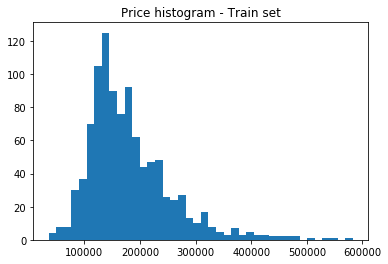

In [96]:
plt.hist(df_train['SalePrice'],bins=40);
plt.title('Price histogram - Train set');

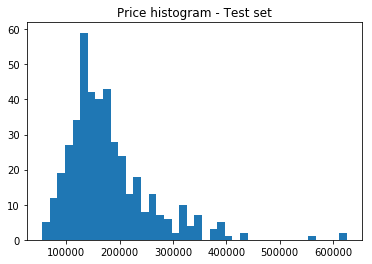

In [87]:
plt.hist(df_test['SalePrice'],bins=40);
plt.title('Price histogram - Test set');

In [211]:
from sklearn.metrics import mean_squared_error

X_train = df_train.drop(['SalePrice'], axis=1, inplace=False)
y_train = df_train['SalePrice']

lg = LinearRegression().fit(X_train,y_train)

In [212]:
X_test = df_test.drop(['SalePrice'], axis=1, inplace=False)
y_test = df_test['SalePrice']

y_train_pred = lg.predict(X_train)
y_test_pred = lg.predict(X_test)

print("LinearRegression train RMSE = {:.2f}".format(np.sqrt(mean_squared_error(y_train, lg.predict(X_train)))))
print("LinearRegression test RMSE = {:.2f}".format(np.sqrt(mean_squared_error(y_test, lg.predict(X_test)))))

LinearRegression train RMSE = 24823.94
LinearRegression test RMSE = 27602.85


In [213]:
Rmse_dict={'LR':np.sqrt(mean_squared_error(y_test, lg.predict(X_test)))}
Rmse_dict

{'LR': 27602.851993205168}

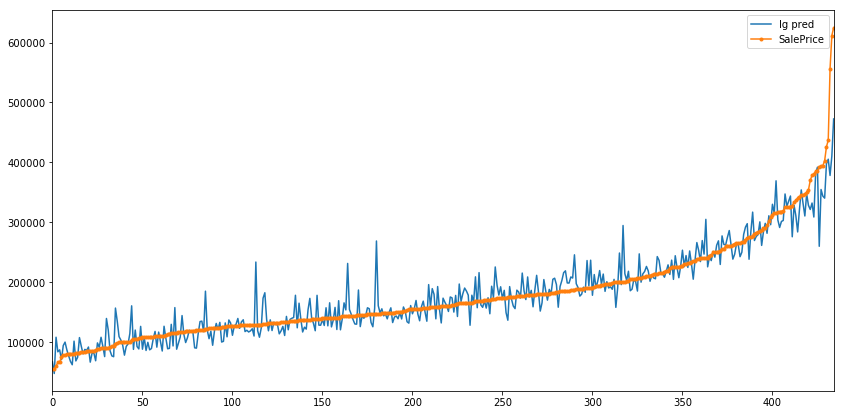

In [214]:
lg = LinearRegression()
lg.fit(X_train,y_train)

df_test = df_test.sort_values('SalePrice').reset_index(drop=True)
X_test = df_test.drop('SalePrice', axis=1)
y_test = df_test[['SalePrice']]

fig = plt.figure(figsize=(14,7))
plt.plot(lg.predict(X_test))
df_test.SalePrice.plot(style='.-')

plt.legend(['lg pred','SalePrice'])

# KNN predict Sale Price

In [215]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(X_train, y_train) 

print("KNN train RMSE = {:.2f}".format(np.sqrt(mean_squared_error(y_train, knn.predict(X_train)))))
print("KNN test RMSE = {:.2f}".format(np.sqrt(mean_squared_error(y_test, knn.predict(X_test)))))

KNN train RMSE = 24883.40
KNN test RMSE = 50814.13


In [216]:
Rmse_dict['KNN 2']= np.sqrt(mean_squared_error(y_test, knn.predict(X_test)))
Rmse_dict

{'LR': 27602.851993205168, 'KNN 2': 50814.12600067666}

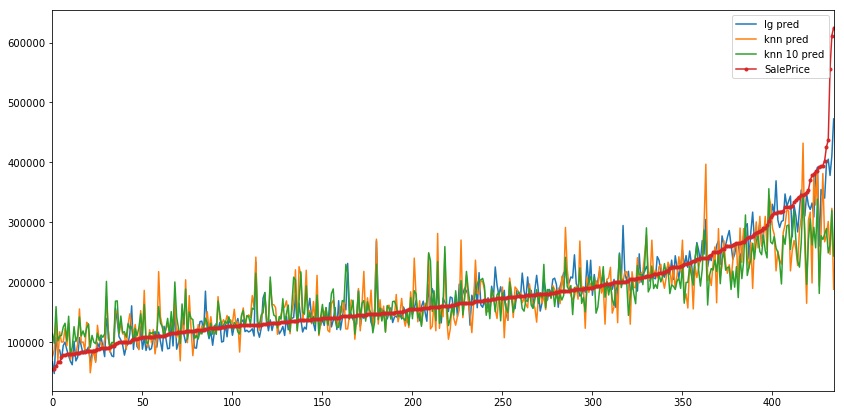

In [217]:
plt.figure(figsize=(14, 7))
knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(X_train, y_train) 

knn10 = KNeighborsRegressor(n_neighbors=10)
knn10.fit(X_train, y_train) 

plt.plot(lg.predict(X_test))
plt.plot(knn.predict(X_test))
plt.plot(knn10.predict(X_test))
df_test.SalePrice.plot(style='.-')

plt.legend(['lg pred','knn pred','knn 10 pred','SalePrice'])



In [218]:
Rmse_dict['KNN 10']= np.sqrt(mean_squared_error(y_test, knn10.predict(X_test)))
Rmse_dict

{'LR': 27602.851993205168,
 'KNN 2': 50814.12600067666,
 'KNN 10': 48009.33232530559}

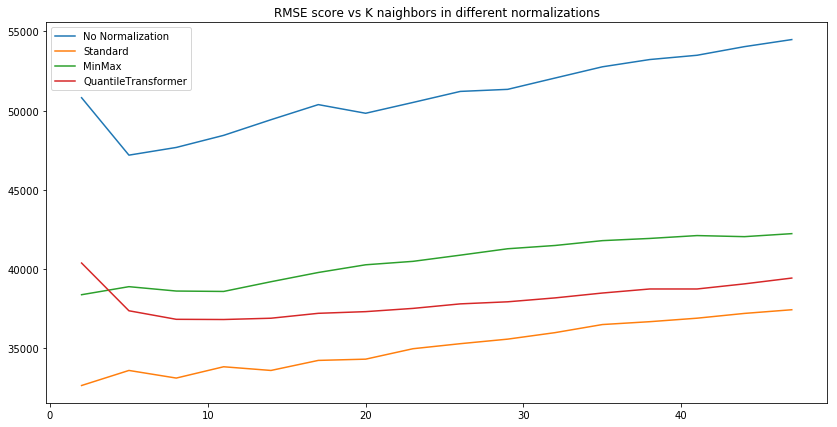

In [219]:
from sklearn.preprocessing import QuantileTransformer

plt.figure(figsize=(14, 7))
scalers =np.array( [['Standard', StandardScaler], 
           ['MinMax', MinMaxScaler], 
           ['QuantileTransformer', QuantileTransformer],
                  ])
Rmse = []
ks = []
legend =[]


for k in range(2,50, 3):
            mdl = KNeighborsRegressor(n_neighbors=k)

            mdl.fit(X_train, y_train)
            y_test_pred = mdl.predict(X_test)
            ks.append(k)
            Rmse.append(np.sqrt(mean_squared_error(y_true=y_test,y_pred=y_test_pred)))
            
plt.plot(ks, Rmse)
legend.append('No Normalization')
Rmse = []
ks = []        
for [scaler_name, scaler_func] in scalers:
        scaler = scaler_func()
        scaler.fit(X_train )
        Xs = scaler.transform(X_train)
        
        X_tests = scaler.transform(X_test)
        
        Rmse = []
        ks = []
        for k in range(2,50, 3):
            mdl = KNeighborsRegressor(n_neighbors=k)

            mdl.fit(Xs, y_train)
            y_test_pred = mdl.predict(X_tests)
            ks.append(k)
            Rmse.append(np.sqrt(mean_squared_error(y_true=y_test,y_pred=y_test_pred)))
            
        plt.plot(ks, Rmse)
        legend.append(scaler_name)

plt.legend(legend, loc='best')
plt.title('RMSE score vs K naighbors in different normalizations');

# Weight parameter in KNN (uniform , distance)

* ‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.

* ‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

In [220]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import average_precision_score, f1_score, log_loss, precision_score
from sklearn.metrics import recall_score

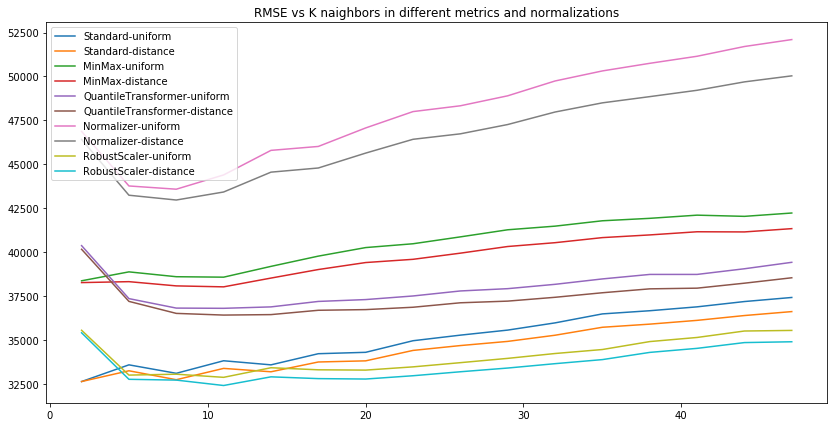

In [221]:
plt.figure(figsize=(14, 7))
scalers =np.array( [['Standard', StandardScaler], 
           ['MinMax', MinMaxScaler], 
           ['QuantileTransformer', QuantileTransformer],
                   ['Normalizer' , Normalizer ],
                   ['RobustScaler', RobustScaler],
                  ])

Rmse = []
ks = []
legend =[]
for [scaler_name, scaler_func] in scalers:
    for weight in ['uniform',  'distance']:    
        scaler = scaler_func()
        scaler.fit(X_train)
        Xs = scaler.transform(X_train)
        
        X_tests = scaler.transform(X_test)
        
        Rmse = []
        ks = []
        for k in range(2,50, 3):
            mdl = KNeighborsRegressor(n_neighbors=k,weights=weight)

            mdl.fit(Xs, y_train)
            y_test_pred = mdl.predict(X_tests)
            ks.append(k)
            Rmse.append(np.sqrt(mean_squared_error(y_true=y_test,y_pred=y_test_pred)))
            
        plt.plot(ks, Rmse)
        legend.append(scaler_name+'-'+weight)
from matplotlib.font_manager import FontProperties

plt.legend(legend, loc='best')
plt.title('RMSE vs K naighbors in different metrics and normalizations');

In [227]:
scaler = RobustScaler()
scaler.fit(X_train)
Xs = scaler.transform(X_train)
        
X_tests = scaler.transform(X_test)
        

mdl = KNeighborsRegressor(n_neighbors=11, weights = 'distance')

mdl.fit(Xs, y_train)
y_test_pred = mdl.predict(X_tests)
          

In [228]:
Rmse_dict['KNN 11 Rob']=np.sqrt(mean_squared_error(y_test, y_test_pred))
Rmse_dict

{'LR': 27602.851993205168,
 'KNN 2': 50814.12600067666,
 'KNN 10': 48009.33232530559,
 'KNN 11 Rob': 32426.270847539185}

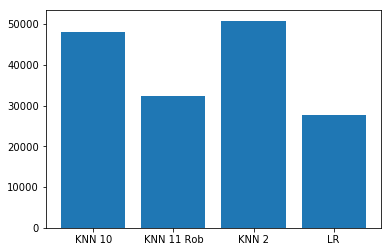

In [229]:
lists = sorted(Rmse_dict.items()) # sorted by key, return a list of tuples

x1, y1 = zip(*lists) # unpack a list of pairs into two tuples

plt.bar(x1, y1)
plt.show()

In [230]:
scaler = RobustScaler()
scaler.fit(X_train)
Xs = scaler.transform(X_train)
        
X_tests = scaler.transform(X_test)

mdl=LinearRegression()
mdl.fit(Xs, y_train)
y_test_pred = mdl.predict(X_tests)
Rmse_dict['LR Rob']=np.sqrt(mean_squared_error(y_test, y_test_pred))
Rmse_dict

{'LR': 27602.851993205168,
 'KNN 2': 50814.12600067666,
 'KNN 10': 48009.33232530559,
 'KNN 11 Rob': 32426.270847539185,
 'LR Rob': 27602.851993205444}

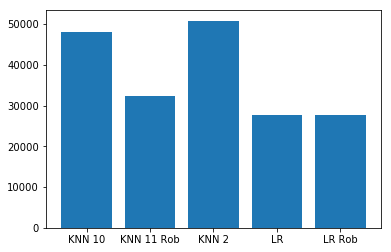

In [231]:
lists = sorted(Rmse_dict.items())

x1, y1 = zip(*lists)

plt.bar(x1, y1)
plt.show()

In [233]:
scaler = StandardScaler()
scaler.fit(X_train)
Xs = scaler.transform(X_train)
        
X_tests = scaler.transform(X_test)

mdl=LinearRegression()
mdl.fit(Xs, y_train)
y_test_pred = mdl.predict(X_tests)
Rmse_dict['LR Stan']=np.sqrt(mean_squared_error(y_test, y_test_pred))
Rmse_dict

{'LR': 27602.851993205168,
 'KNN 2': 50814.12600067666,
 'KNN 10': 48009.33232530559,
 'KNN 11 Rob': 32426.270847539185,
 'LR Rob': 27602.851993205444,
 'LR Stan': 27602.851993205462}

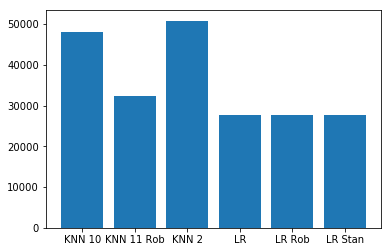

In [234]:
lists = sorted(Rmse_dict.items())

x1, y1 = zip(*lists)

plt.bar(x1, y1)
plt.show()

### DecisionTreeRegressor

In [240]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=7)

In [241]:
y_train_pred = dt.fit(X_train, y_train).predict(X_train)
df_train['pred'] = y_train_pred

y_test_pred = dt.fit(X_train, y_train).predict(X_test)
df_test['pred'] = y_test_pred

df_train=df_train.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)

In [245]:
Rmse_dict['DT 7']=np.sqrt(mean_squared_error(y_test, y_test_pred))
Rmse_dict

{'LR': 27602.851993205168,
 'KNN 2': 50814.12600067666,
 'KNN 10': 48009.33232530559,
 'KNN 11 Rob': 32426.270847539185,
 'LR Rob': 27602.851993205444,
 'LR Stan': 27602.851993205462,
 'DT 3': 38019.446452001066,
 'DT 7': 38019.446452001066}

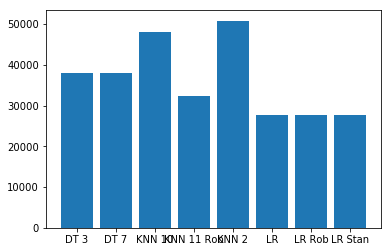

In [246]:
lists = sorted(Rmse_dict.items())

x1, y1 = zip(*lists)

plt.bar(x1, y1)
plt.show()

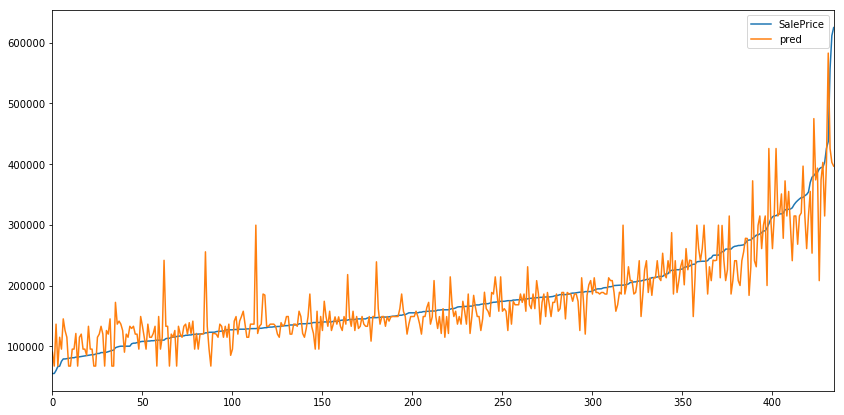

In [247]:
plt.figure(figsize=(14, 7))
df_test.SalePrice.plot()
df_test.pred.plot()
plt.legend()